## Tests

Code to understand particularities of the model so far. 

In [1]:
import pandas as pd
import numpy as np
import mesa
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import the game
from coordination_game import coordination_agent, coordination_model

# Graphs font
plt.rcParams['font.family'] = 'Georgia'
color_dict = {
    'Anti - environment': 'orange',
    'Neutral': 'blue',
    'Pro - environment': 'green'
}

# Set seeds
np.random.seed(666)
random.seed(666)


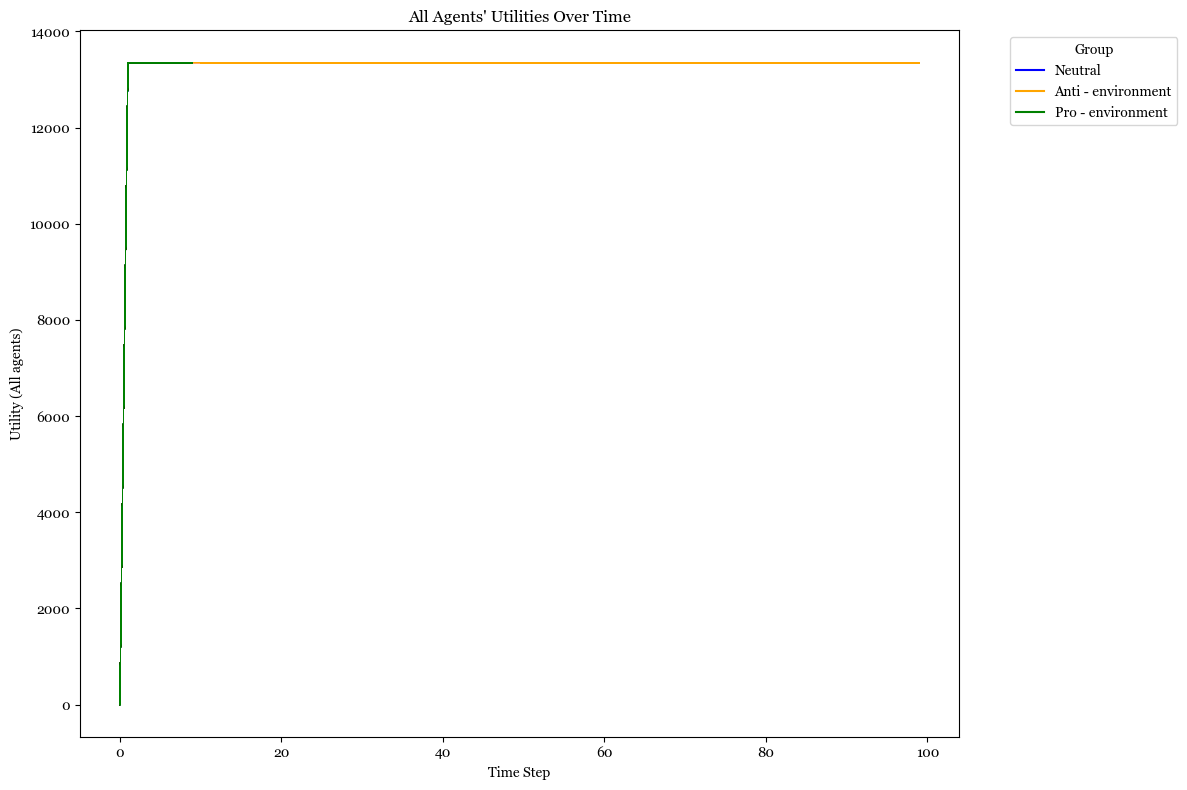

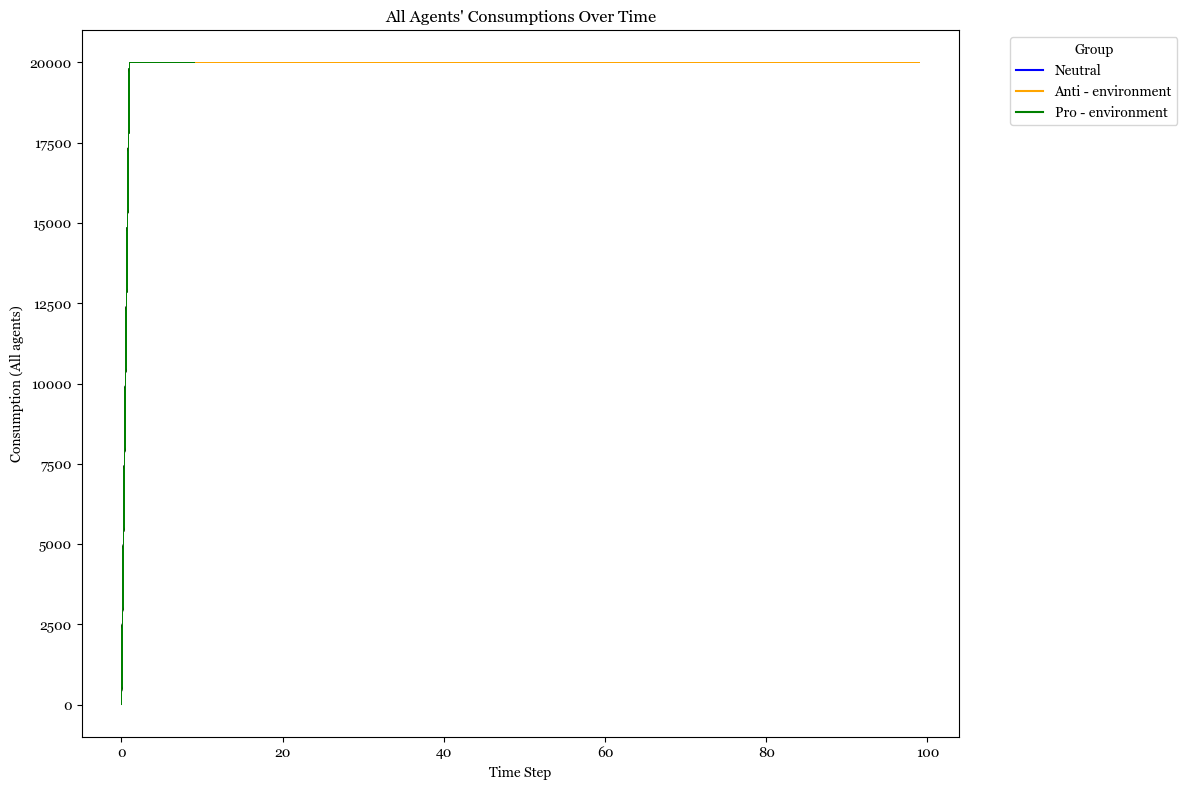

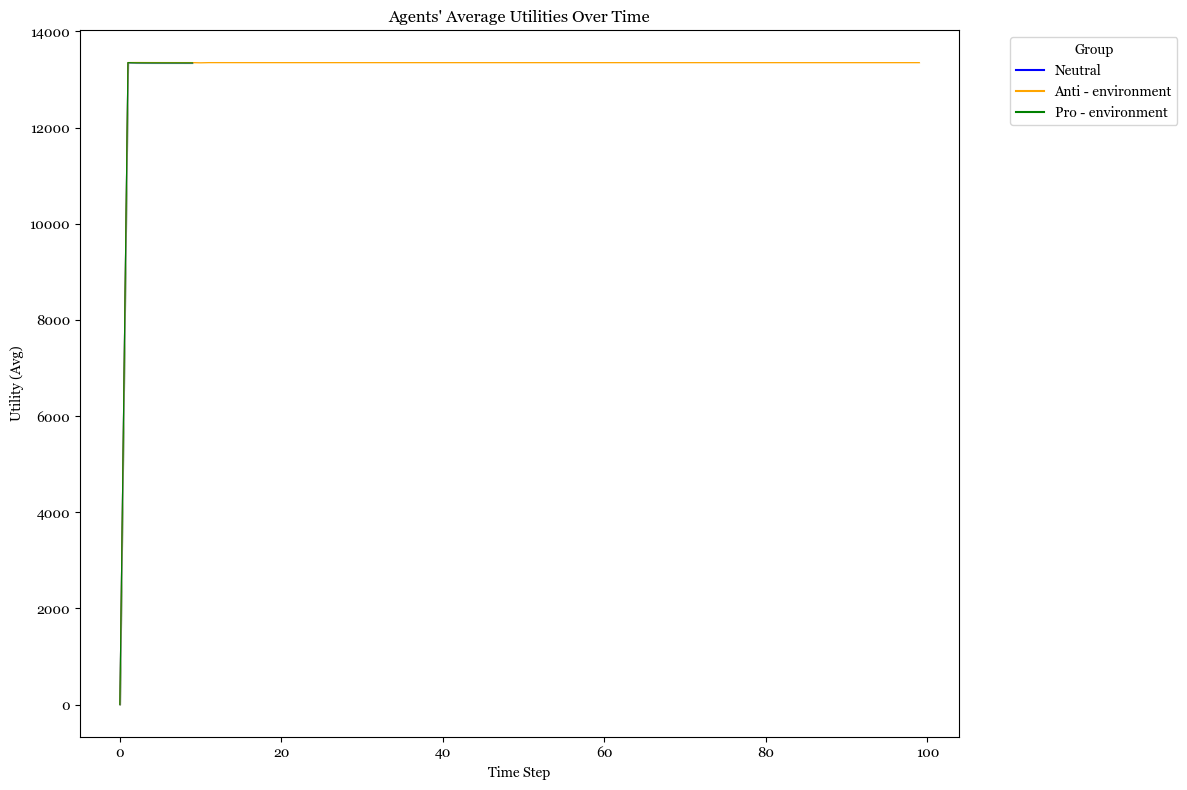

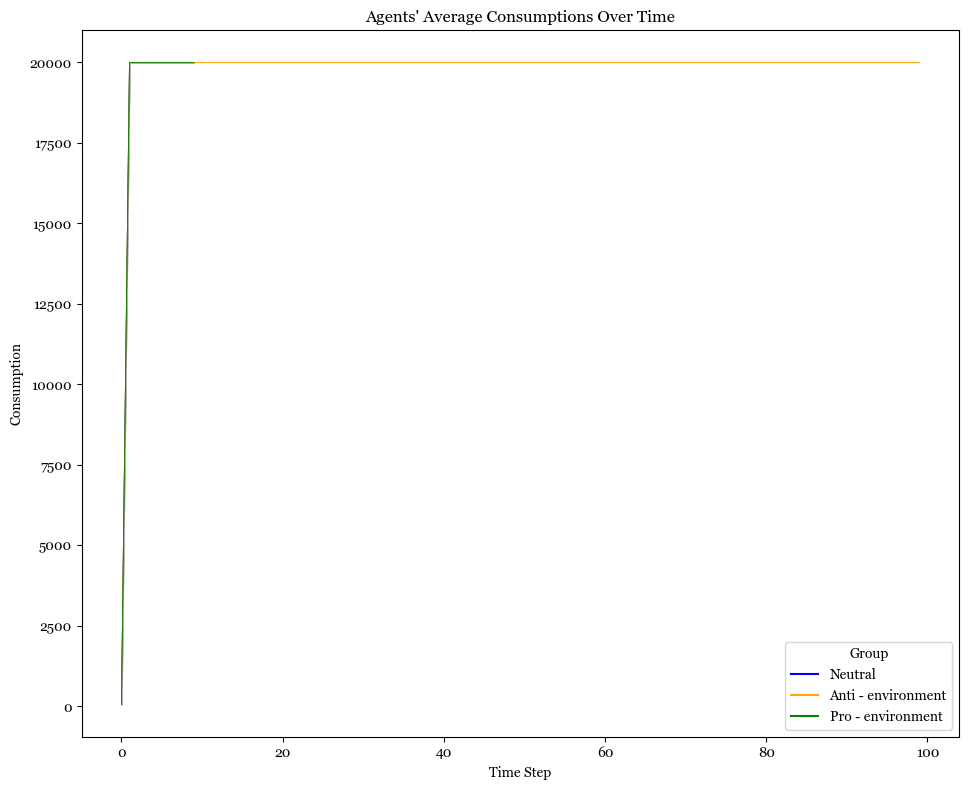

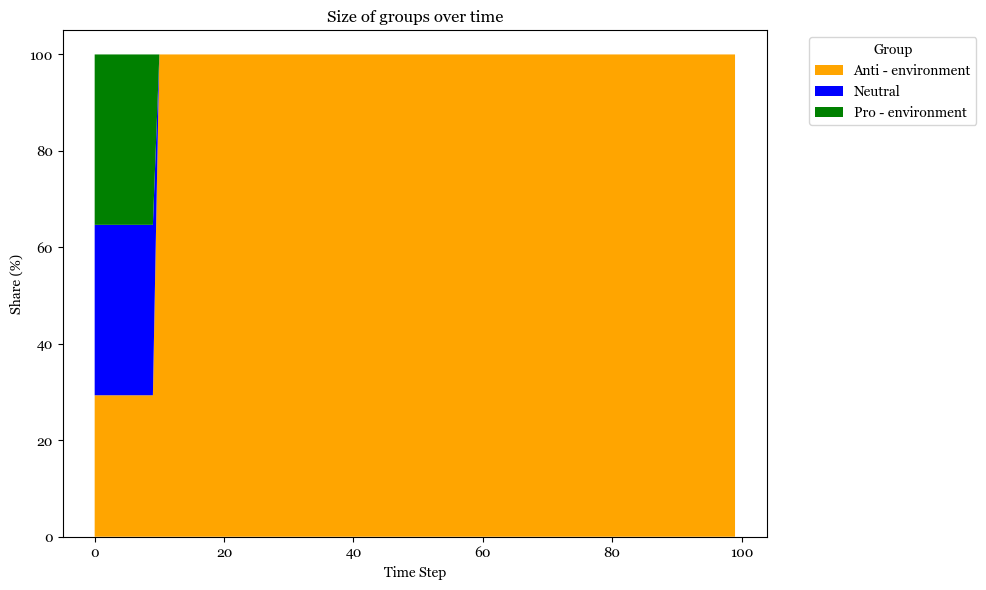

In [2]:
# Set the number of agents and other parameters
N = 300  # Number of agents
lambda1 = 2/3
lambda2 = 1/3
alpha = 1
beta = 2/3
steps_convincement = 5

# Initialize the model
model = coordination_model(N, lambda1, lambda2, alpha = alpha, beta = beta, steps_convincement = steps_convincement)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()


# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Utility', hue='Group', legend='full', linewidth=0.6, alpha = 0.4, estimator=None, palette= color_dict)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 0.4, estimator=None, palette= color_dict)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Group data by Step and Group for utilities
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.8, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Consumptions Over Time")
plt.xlabel("Time Step")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.legend(title='Group')
plt.show()


# Count the number of individuals in each group at each `Step`
group_shares = agent_data.groupby(['Step', 'Group'])['AgentID'].count().reset_index()

# Normalize the counts within each `Step` to get shares
group_shares['Share'] = group_shares['AgentID'].apply(lambda x: x * 100 / N)

# Pivot the data to ensure all steps have entries for each group, filling missing values with zero
pivoted_shares = group_shares.pivot(index='Step', columns='Group', values='Share').fillna(0)

# Extract the data for plotting, ensuring they align with `Step`
steps_stack = pivoted_shares.index.tolist()
anti_stack = pivoted_shares.get('Anti - environment', 0).tolist()
neutral_stack = pivoted_shares.get('Neutral', 0).tolist()
pro_stack = pivoted_shares.get('Pro - environment', 0).tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(
    steps_stack, 
    anti_stack, 
    neutral_stack, 
    pro_stack, 
    labels=['Anti - environment', 'Neutral', 'Pro - environment'], 
    colors=[color_dict['Anti - environment'], color_dict['Neutral'], color_dict['Pro - environment']]
)
plt.title("Size of groups over time")
plt.xlabel("Time Step")
plt.ylabel("Share (%)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



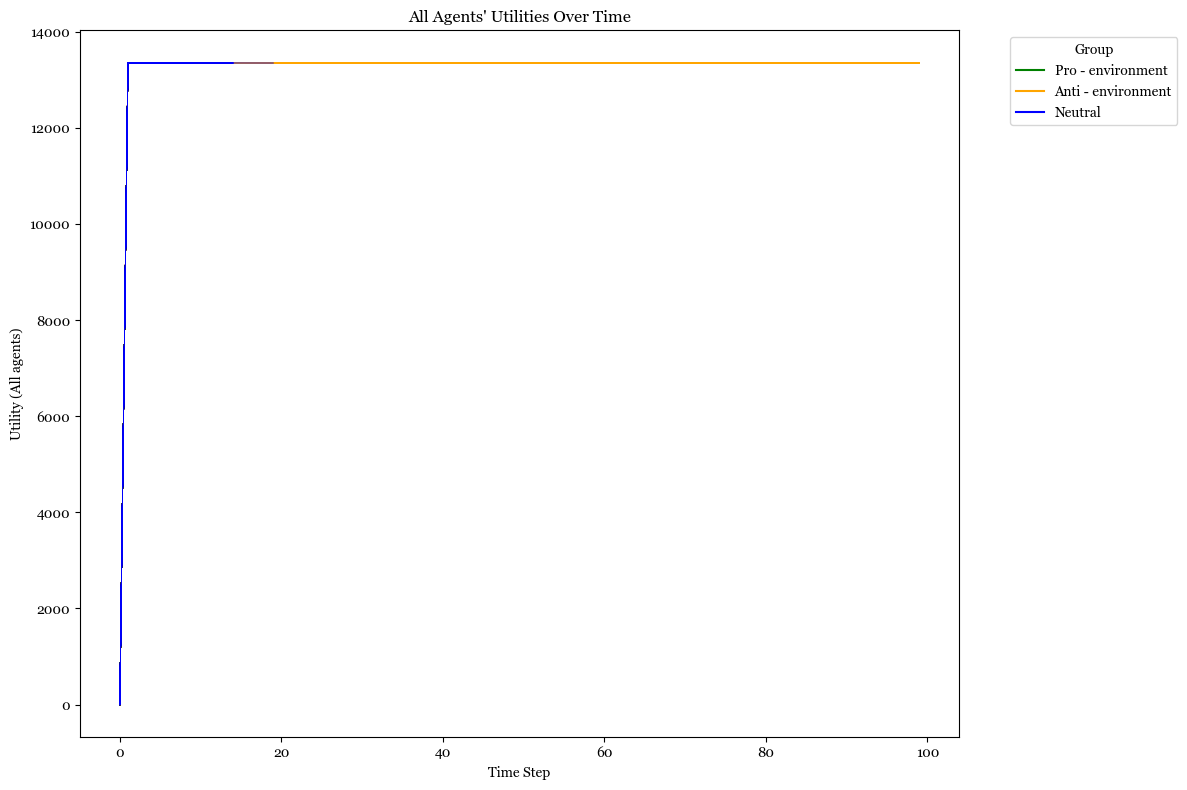

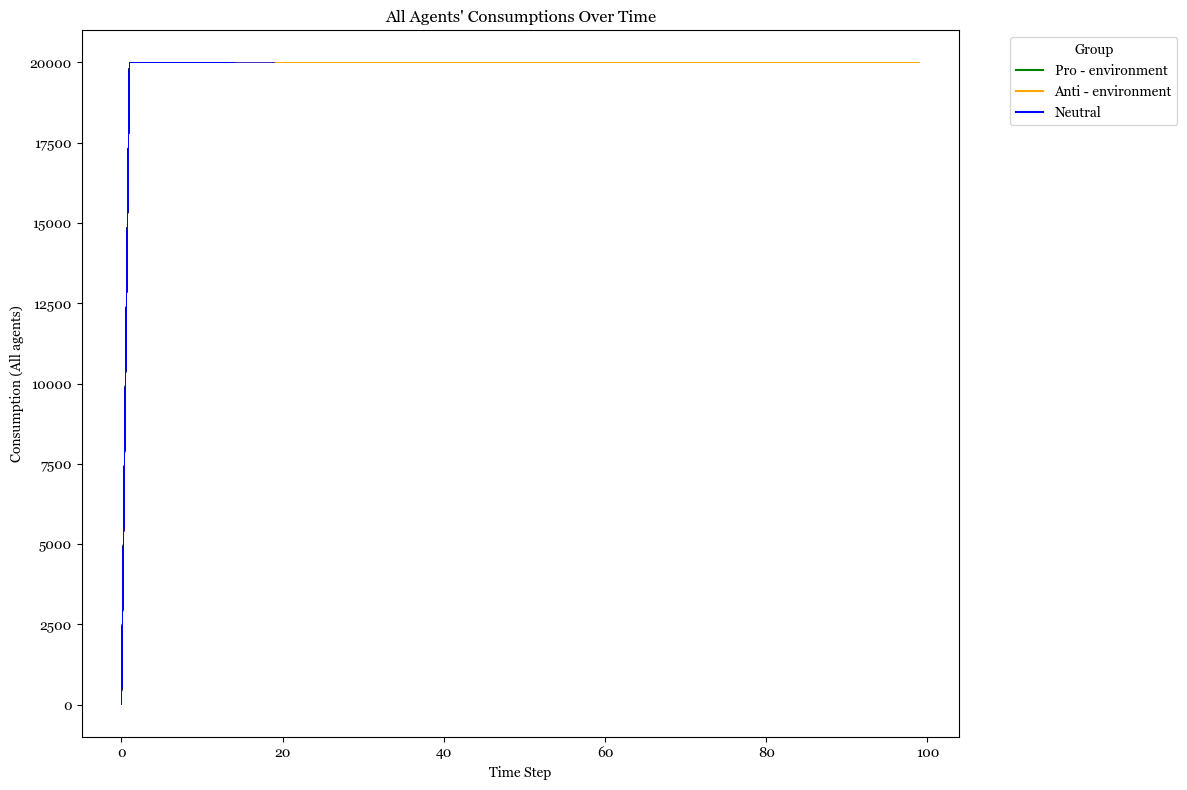

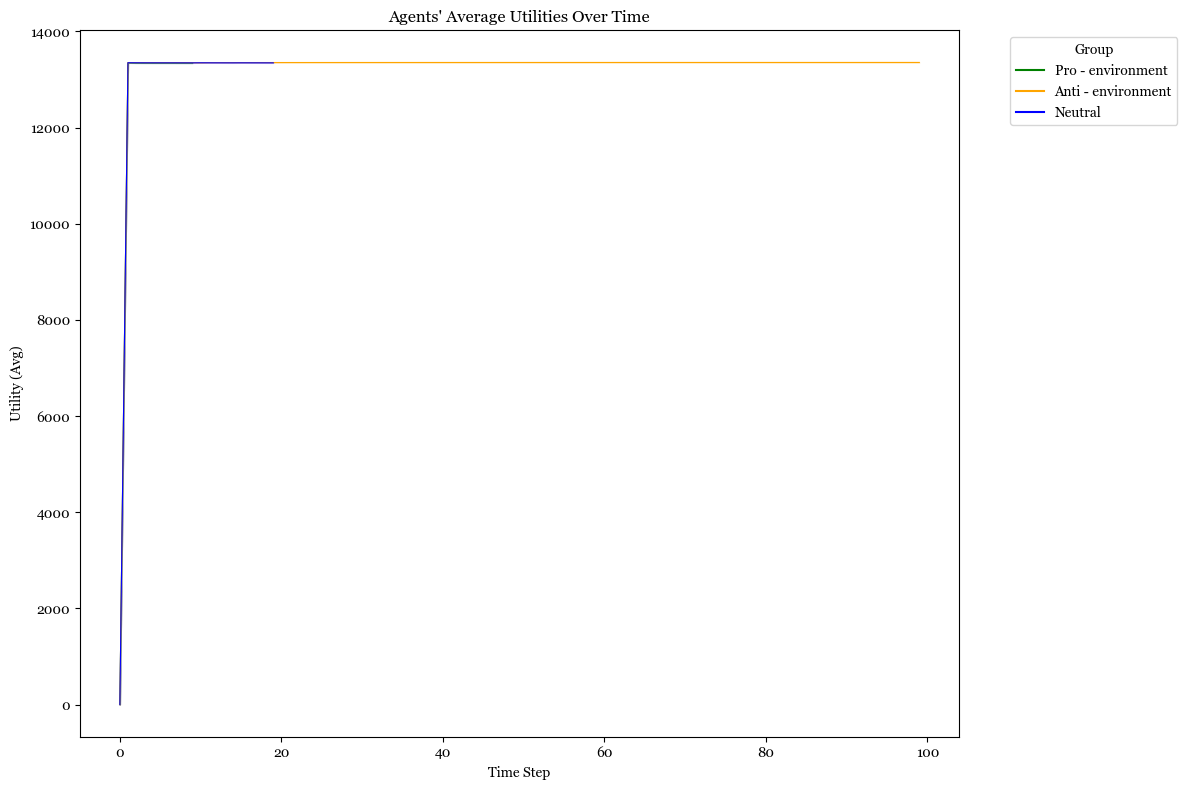

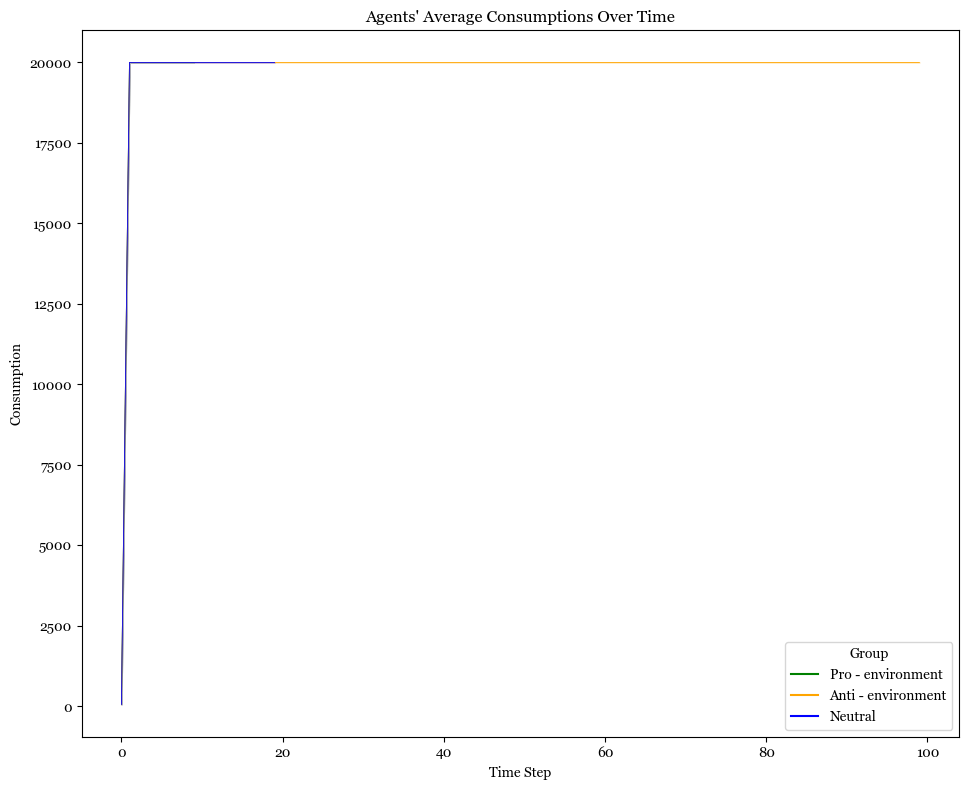

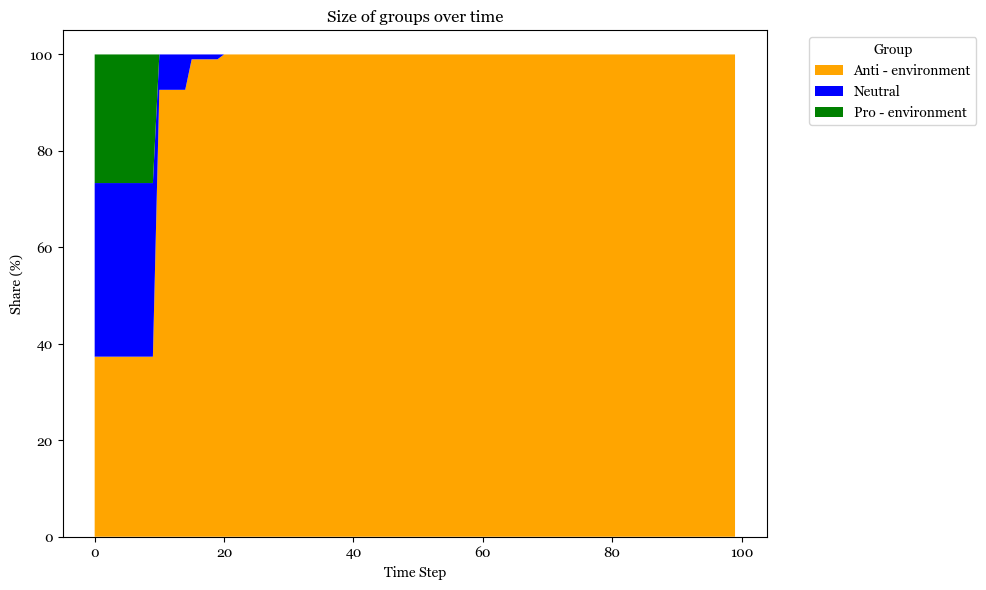

In [3]:
# Set the number of agents and other parameters
N = 300  # Number of agents
lambda1 = 2/3
lambda2 = 1/3
alpha = 3/4
beta = 2/3
steps_convincement = 5

# Initialize the model
model = coordination_model(N, lambda1, lambda2, alpha = alpha, beta = beta, steps_convincement = steps_convincement)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()


# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Utility', hue='Group', legend='full', linewidth=0.6, alpha = 0.4, estimator=None, palette= color_dict)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 0.4, estimator=None, palette= color_dict)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Group data by Step and Group for utilities
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.8, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Consumptions Over Time")
plt.xlabel("Time Step")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.legend(title='Group')
plt.show()


# Count the number of individuals in each group at each `Step`
group_shares = agent_data.groupby(['Step', 'Group'])['AgentID'].count().reset_index()

# Normalize the counts within each `Step` to get shares
group_shares['Share'] = group_shares['AgentID'].apply(lambda x: x * 100 / N)

# Pivot the data to ensure all steps have entries for each group, filling missing values with zero
pivoted_shares = group_shares.pivot(index='Step', columns='Group', values='Share').fillna(0)

# Extract the data for plotting, ensuring they align with `Step`
steps_stack = pivoted_shares.index.tolist()
anti_stack = pivoted_shares.get('Anti - environment', 0).tolist()
neutral_stack = pivoted_shares.get('Neutral', 0).tolist()
pro_stack = pivoted_shares.get('Pro - environment', 0).tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(
    steps_stack, 
    anti_stack, 
    neutral_stack, 
    pro_stack, 
    labels=['Anti - environment', 'Neutral', 'Pro - environment'], 
    colors=[color_dict['Anti - environment'], color_dict['Neutral'], color_dict['Pro - environment']]
)
plt.title("Size of groups over time")
plt.xlabel("Time Step")
plt.ylabel("Share (%)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


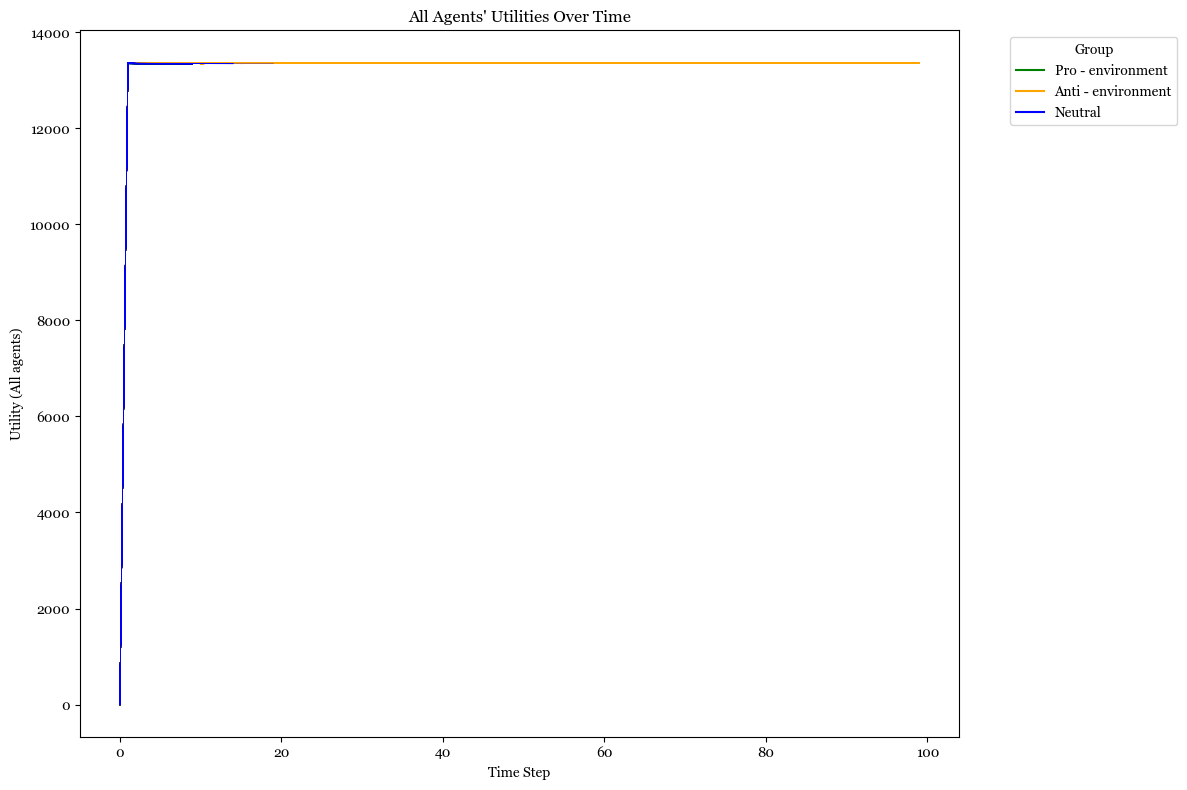

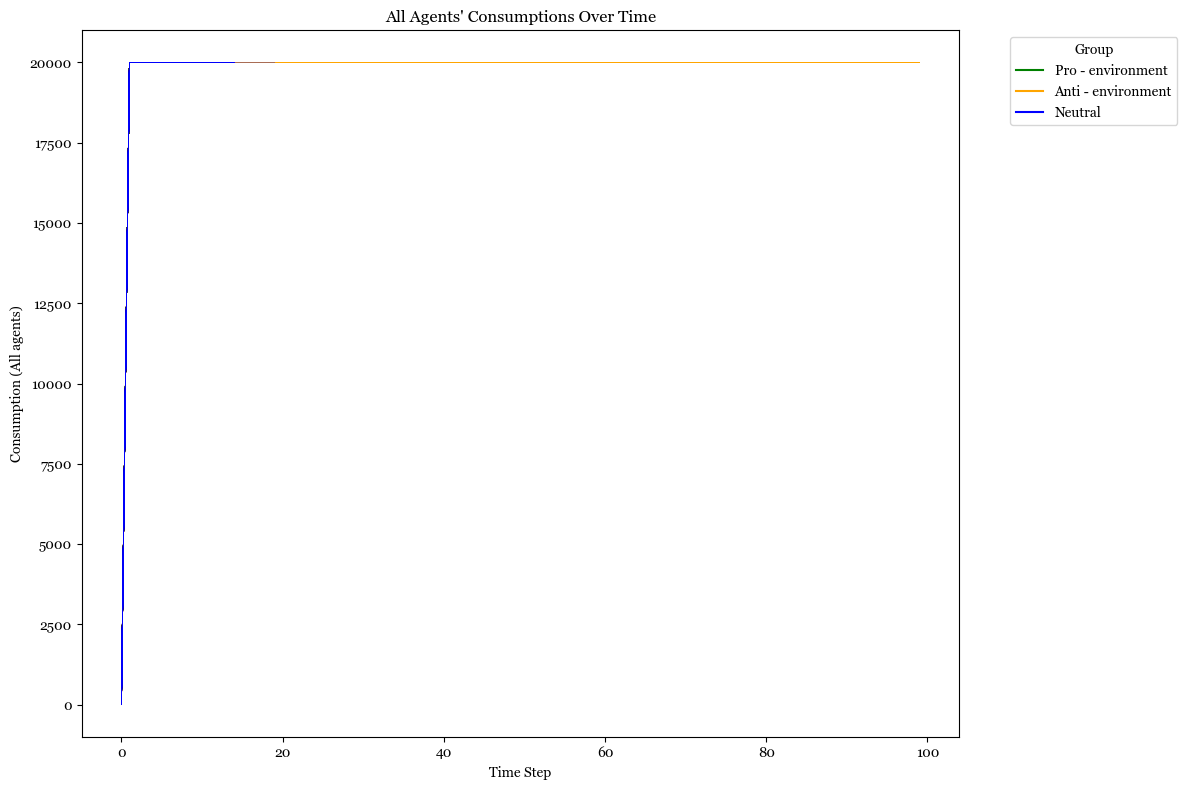

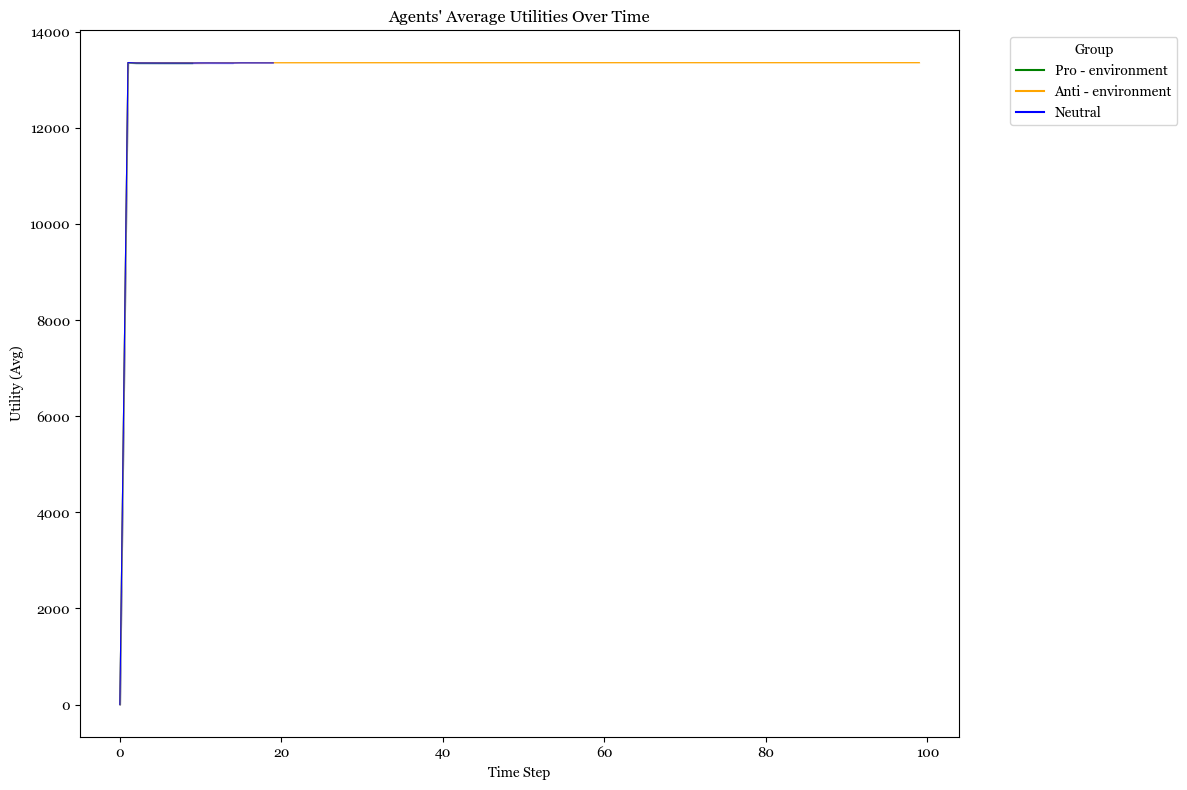

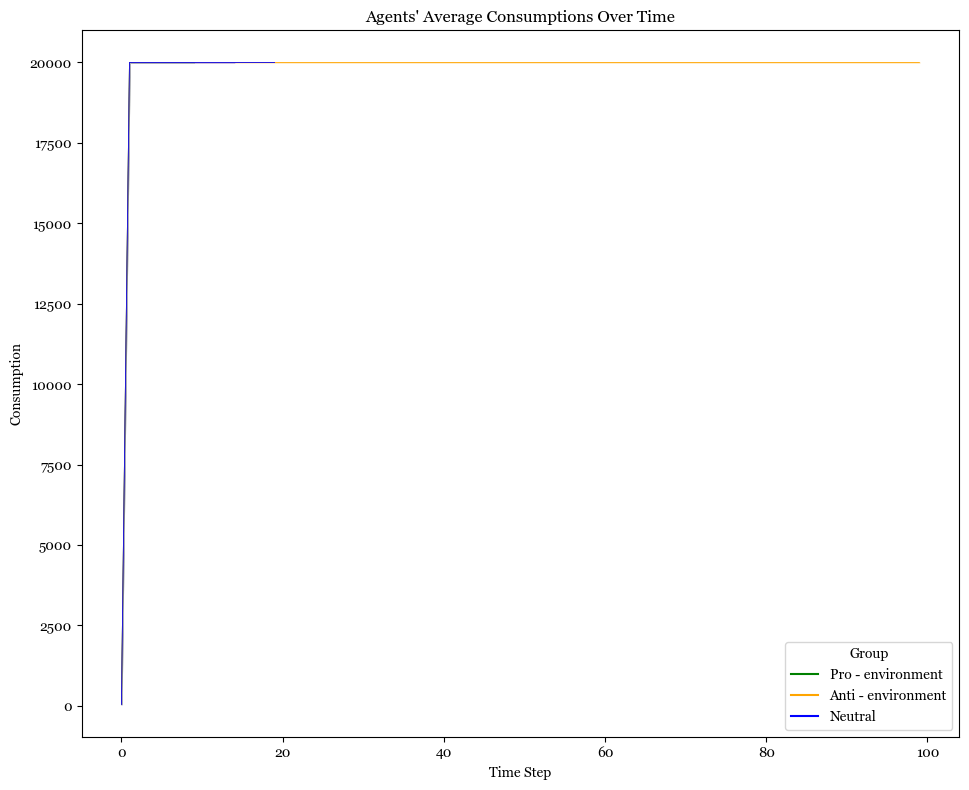

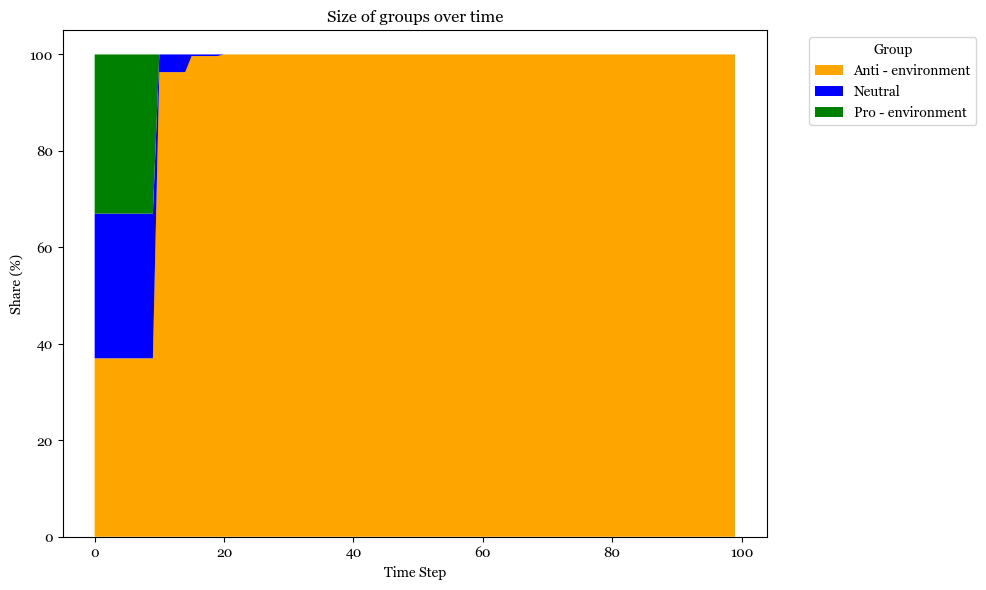

In [4]:
# Set the number of agents and other parameters
N = 300  # Number of agents
lambda1 = 0.6666667
lambda2 = 1/3
alpha = 3/4
beta = 2/3
steps_convincement = 5

# Initialize the model
model = coordination_model(N, lambda1, lambda2, alpha = alpha, beta = beta, steps_convincement = steps_convincement)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()


# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Utility', hue='Group', legend='full', linewidth=0.6, alpha = 0.4, estimator=None, palette= color_dict)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 0.4, estimator=None, palette= color_dict)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Group data by Step and Group for utilities
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.8, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Consumptions Over Time")
plt.xlabel("Time Step")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.legend(title='Group')
plt.show()


# Count the number of individuals in each group at each `Step`
group_shares = agent_data.groupby(['Step', 'Group'])['AgentID'].count().reset_index()

# Normalize the counts within each `Step` to get shares
group_shares['Share'] = group_shares['AgentID'].apply(lambda x: x * 100 / N)

# Pivot the data to ensure all steps have entries for each group, filling missing values with zero
pivoted_shares = group_shares.pivot(index='Step', columns='Group', values='Share').fillna(0)

# Extract the data for plotting, ensuring they align with `Step`
steps_stack = pivoted_shares.index.tolist()
anti_stack = pivoted_shares.get('Anti - environment', 0).tolist()
neutral_stack = pivoted_shares.get('Neutral', 0).tolist()
pro_stack = pivoted_shares.get('Pro - environment', 0).tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(
    steps_stack, 
    anti_stack, 
    neutral_stack, 
    pro_stack, 
    labels=['Anti - environment', 'Neutral', 'Pro - environment'], 
    colors=[color_dict['Anti - environment'], color_dict['Neutral'], color_dict['Pro - environment']]
)
plt.title("Size of groups over time")
plt.xlabel("Time Step")
plt.ylabel("Share (%)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
lambda2 = 1/3
beta = 2/3
steps_convincement = 5
num_steps = 100  # Number of simulation steps

# Define a range of lambda1 values from 0 to (1 - lambda2)
lambda1_values = np.linspace(0, 1 - lambda2, num=30)

In [6]:
lambda1_values

array([0.        , 0.02298851, 0.04597701, 0.06896552, 0.09195402,
       0.11494253, 0.13793103, 0.16091954, 0.18390805, 0.20689655,
       0.22988506, 0.25287356, 0.27586207, 0.29885057, 0.32183908,
       0.34482759, 0.36781609, 0.3908046 , 0.4137931 , 0.43678161,
       0.45977011, 0.48275862, 0.50574713, 0.52873563, 0.55172414,
       0.57471264, 0.59770115, 0.62068966, 0.64367816, 0.66666667])

In [7]:
2/3 < 0.66666667

True

In [8]:
2/3

0.6666666666666666

In [9]:
3/4

0.75